<a href="https://colab.research.google.com/github/mohdimad29/Artificial_Neural_Network/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
# Brief Introduction of Training Data
print("---------------Train Dataset Shape---------------")
display(data.shape)
print("---------------Describing Numerical Variables---------------")
display(data.describe(exclude="object").T)
print("---------------Feature Information---------------")
display(data.info())
## Duplicated rows
print("---------------duplicates---------------")
display(data.duplicated().sum())

---------------Train Dataset Shape---------------


(10000, 14)

---------------Describing Numerical Variables---------------


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


---------------Feature Information---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

---------------duplicates---------------


0

In [ ]:
#checking the first 5 rows of the data
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#checking the unique values from every attribute
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#Converting all the attributes whose unique values are below 5 into categorical columns
cat_attr = ['Gender','Geography']
data[cat_attr] = data[cat_attr].astype('category')

In [ ]:
#creating dummies for categorical feature
df = pd.get_dummies(data,columns=cat_attr,drop_first=True)  #we use drop first to represent 2 represent equal categories with less dummy attributes involved

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
2897,2898,15664150,Holland,528,29,9,170214.23,2,1,0,49284.00,0,0,1,0
4695,4696,15786739,Clements,669,37,1,125529.55,1,1,1,162260.93,0,1,0,0
3864,3865,15808960,Alleyne,620,40,5,108197.11,2,1,0,49722.34,0,1,1,0
4066,4067,15736154,Gallo,823,44,1,0.00,2,0,1,182495.70,0,0,0,0
3419,3420,15684103,Mellor,674,26,10,0.00,2,1,1,138423.10,0,0,0,0


In [ ]:
#dropping irrelevant attributes
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Gender_Male            uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
y = df['Exited']
X = df.drop(['Exited'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,42,1,75681.52,1,1,1,57098.00,1,1,0
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,0,1,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,0,1
3264,738,35,5,161274.05,2,1,0,181429.87,1,0,0
9845,590,38,9,0.00,2,1,1,148750.16,0,0,1


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#ANN
from tensorflow.keras.models import Sequential               #for our forward and backward propagation
from tensorflow.keras.layers import Dense                    #to create neurons in our layers
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #importing activation functions
from tensorflow.keras.layers import Dropout                  #dropout regularization to avoid overfitting 

In [ ]:
#initializing the ANN
ann = Sequential()

In [ ]:
#Adding input layers that is our dataset attributes
ann.add(Dense(units=11,activation='relu'))
#Adding first hidden layer
ann.add(Dense(units=7,activation='relu'))
ann.add(Dropout(0.2))
#Adding second hidden layer
ann.add(Dense(units=6,activation='relu'))
ann.add(Dropout(0.2))
#Adding output layer
ann.add(Dense(1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#default the learning rate adam uses is 0.01
#to provide own learning rate 
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01) 

In [ ]:
#import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

In [ ]:
model_history = ann.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50,callbacks=early_stopping) #giving more number of epochs will not be a problem because we can use early stopping in that case(when there is no much change in accuracy)

Epoch 1/50
536/536 [==============================] - 5s 5ms/step - loss: 0.5296 - accuracy: 0.7949 - val_loss: 0.4663 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 4s 7ms/step - loss: 0.4705 - accuracy: 0.7962 - val_loss: 0.4463 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4584 - accuracy: 0.7962 - val_loss: 0.4423 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4515 - accuracy: 0.7962 - val_loss: 0.4371 - val_accuracy: 0.7955
Epoch 5/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4408 - accuracy: 0.7962 - val_loss: 0.4327 - val_accuracy: 0.7955
Epoch 6/50
536/536 [==============================] - 4s 7ms/step - loss: 0.4381 - accuracy: 0.7962 - val_loss: 0.4288 - val_accuracy: 0.7955
Epoch 7/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4310 - accuracy: 0.7962 - val_loss: 0.4234 - val_accuracy: 0.7955
Epoch 

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

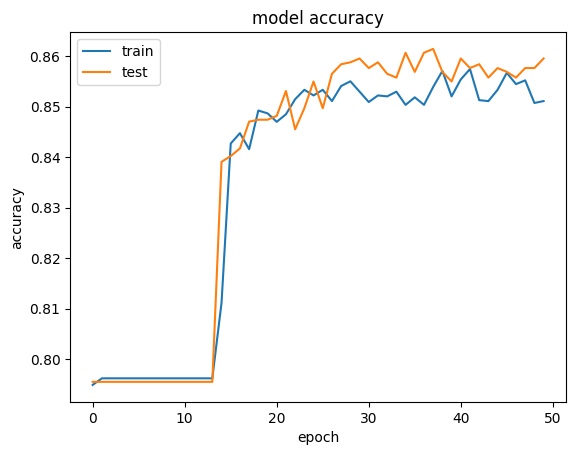

In [ ]:
 #summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

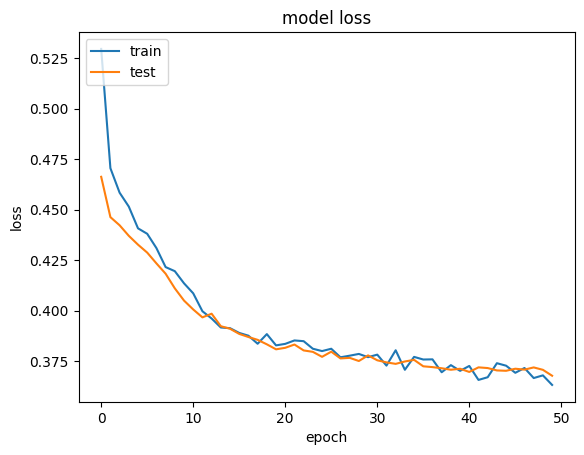

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Making the predictions and evaluating the model



In [ ]:
#Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1520,   75],
       [ 203,  202]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.861

In [ ]:
#to check and get the weights involved 
ann.get_weights()

[array([[ 0.06923532, -0.17010191,  0.10061268, -0.3324405 ,  0.12956114,
          0.1401968 ,  0.00924146,  0.40977362,  0.2037013 ,  0.30960172,
         -0.23849133],
        [ 0.29506454,  0.12074411,  0.13338642,  0.22887851,  0.21657446,
         -0.52123183,  0.11386293,  0.73927206,  0.7468111 , -0.573152  ,
          0.90031695],
        [-0.08524703, -0.09831446, -0.0862981 , -0.25374553, -0.05633348,
         -0.14103253, -0.16943139,  0.0264242 ,  0.1443291 ,  0.29039255,
         -0.22078635],
        [-0.1881738 ,  0.2474181 ,  0.00844298,  0.31706852,  0.7223972 ,
         -0.03978748,  0.22770433,  0.21605802,  0.16829388,  0.05412025,
          0.02674126],
        [-1.1774899 , -0.38274997,  0.10109209, -0.06289031,  0.77302444,
          0.30628705,  1.1701891 ,  0.27953413,  0.56597686,  0.06342199,
         -0.4598747 ],
        [ 0.25326553,  0.04496701,  0.15734446,  0.35395557, -0.16167249,
         -0.04660013,  0.14212778,  0.09871645,  0.13934101,  0.0817155